In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as ineg

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


$$m(t) = 2+0.25cos(0.25t)$$
$$u=u_{ff}+u_{fb}$$
$$u_{ff}=m(t)\ddot{x}_d(t)+b\dot{x}+kx$$
$$u_{fb}=k_d(\dot{x}_d(t)-\dot{x}(t))+k_p(x_d(t)-x(t))$$

## Task 1:

model and sumulate spring-mass-damper system with varying mass with
$u = 0$ for several different initial conditions

**Answer**

$u = 0 \Rightarrow u_{ff}=-u{fb}$

$$m(t)\ddot{x}_d(t)+b\dot{x}+kx=-k_d(\dot{x}_d(t)-\dot{x}(t))-k_p(x_d(t)-x(t))$$

Also it is known that $$m\ddot{x} + b\dot{x} + kx = 0$$

In [23]:
# simple simulation:

b = 0.25
k = 0.32

def m(t):
    return 2 + 0.25*np.cos(0.25*t)

def A(t):
    return np.array([[-b/m(t), -k/m(t)], 
                     [1, 0]])

def approx(x, t):
    return np.dot(A(t), x)

time = np.linspace(0, 120, 1000)
x0 = np.random.rand(2)*0.01

res = ineg.odeint(approx, x0, time)


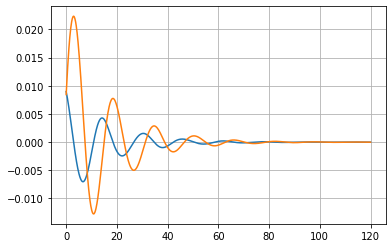

In [24]:
plt.plot(time, res)
plt.grid()

## Task2

rewrite dynamics in regressor form $u = Y (\ddot{x}, \dot{x}, x)\pi$

$$u = m(t)\ddot{x}_d(t)+b\dot{x}+kx + k_d(\dot{x}_d(t)-\dot{x}(t))+k_p(x_d(t)-x(t))$$

$$u = \begin{bmatrix}\ddot{x} \\ \dot{x} \\ x\end{bmatrix}\begin{bmatrix}m(t) & b & k\end{bmatrix}$$

## Task 3

implement online parameter estimation using gradient descent (Slide 8 of
today’s lecture). Keep in mind that π̂ is the output of the dynamic system!

In [ ]:
dt = time[1]-time[0]
L = np.array([[0.9, 0, 0],
              [0, 1.1, 0],
              [0, 0, 1]])

acc = [res[k][0] - res[k-1][0] for k in range(1, len(t))]
acc.append([0])

Y = np.array([acc, res.T[0], res.T[1]])

for t in time:
    d_theta_bar = - dt * np.dot(L, np.dot(Y.T, Y)).dot(theta - theta_bar)
    theta_bar += d_thea_bar